Best max_depth: 20
Train R^2: 0.4572795360048816
Test R^2: 0.36729404613709304
Test MSE: 201.84842015996313


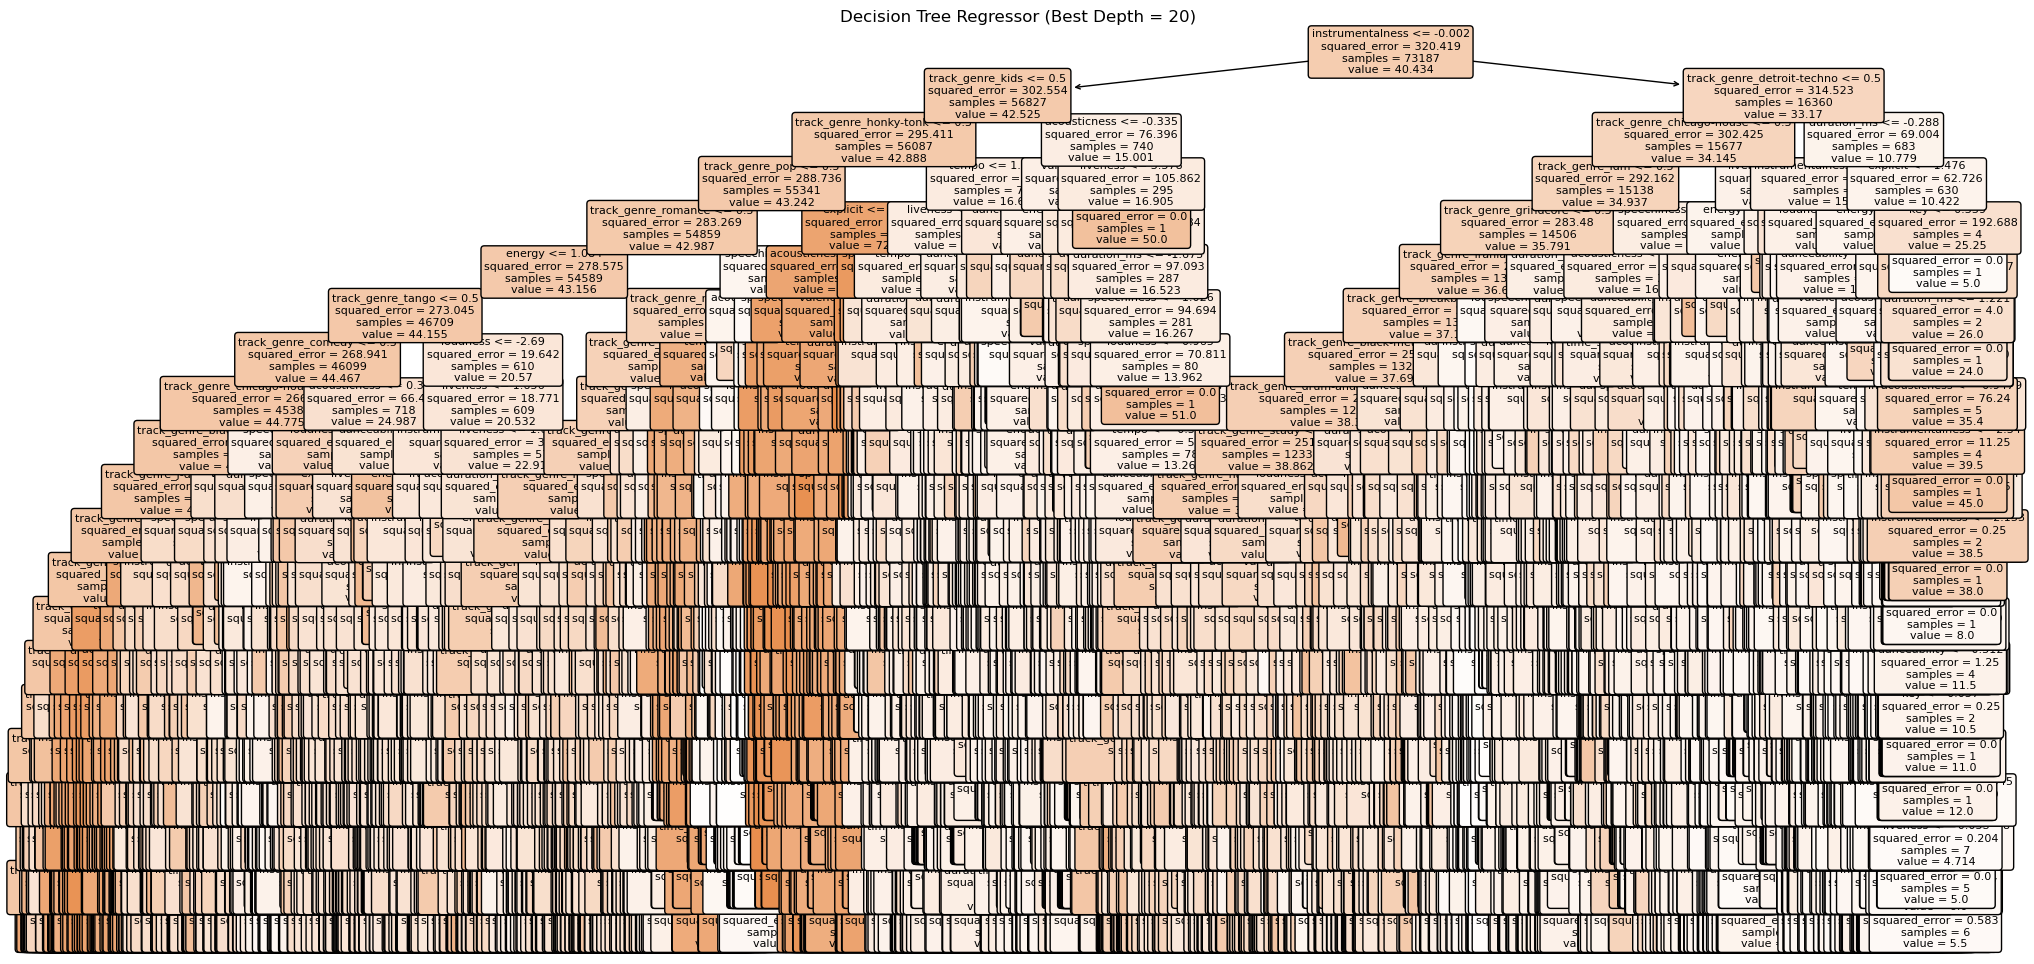

In [ ]:
# Regular Decision Tree with Grid Search

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

df = pd.read_csv("Cleaned_Dataset.csv")

df['explicit'] = df['explicit'].astype(int)

numerical_features = [
    'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
    'mode', 'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo', 'time_signature'
]

categorical_features = ['track_genre']
all_features = numerical_features + categorical_features
X = df[all_features]
y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One Hot Encode
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Pipeline with DecisionTreeRegressor
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', DecisionTreeRegressor(random_state=42))
])

# Grid search
param_grid = {
    'model__max_depth': [9, 10, 12, 15, 20]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_pipeline = grid_search.best_estimator_
y_train_pred = best_pipeline.predict(X_train)
y_test_pred = best_pipeline.predict(X_test)

print("Best max_depth:", grid_search.best_params_['model__max_depth'])
print("Train R^2:", r2_score(y_train, y_train_pred))
print("Test R^2:", r2_score(y_test, y_test_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))

best_tree = best_pipeline.named_steps['model']
X_encoded = preprocessor.fit_transform(X_train)  # get feature names for visualization

ohe = preprocessor.named_transformers_['cat']
encoded_cat_names = ohe.get_feature_names_out(categorical_features)
feature_names = numerical_features + list(encoded_cat_names)

plt.figure(figsize=(24, 12))
plot_tree(best_tree, feature_names=feature_names, filled=True, rounded=True, fontsize=8)
plt.title(f"Decision Tree Regressor (Best Depth = {grid_search.best_params_['model__max_depth']})")
plt.show()

Best Parameters: {'model__max_depth': 20, 'model__min_samples_leaf': 20}
Train R²: 0.42348297384298017
Test R²: 0.402043118082013
Test MSE: 190.76263025821868


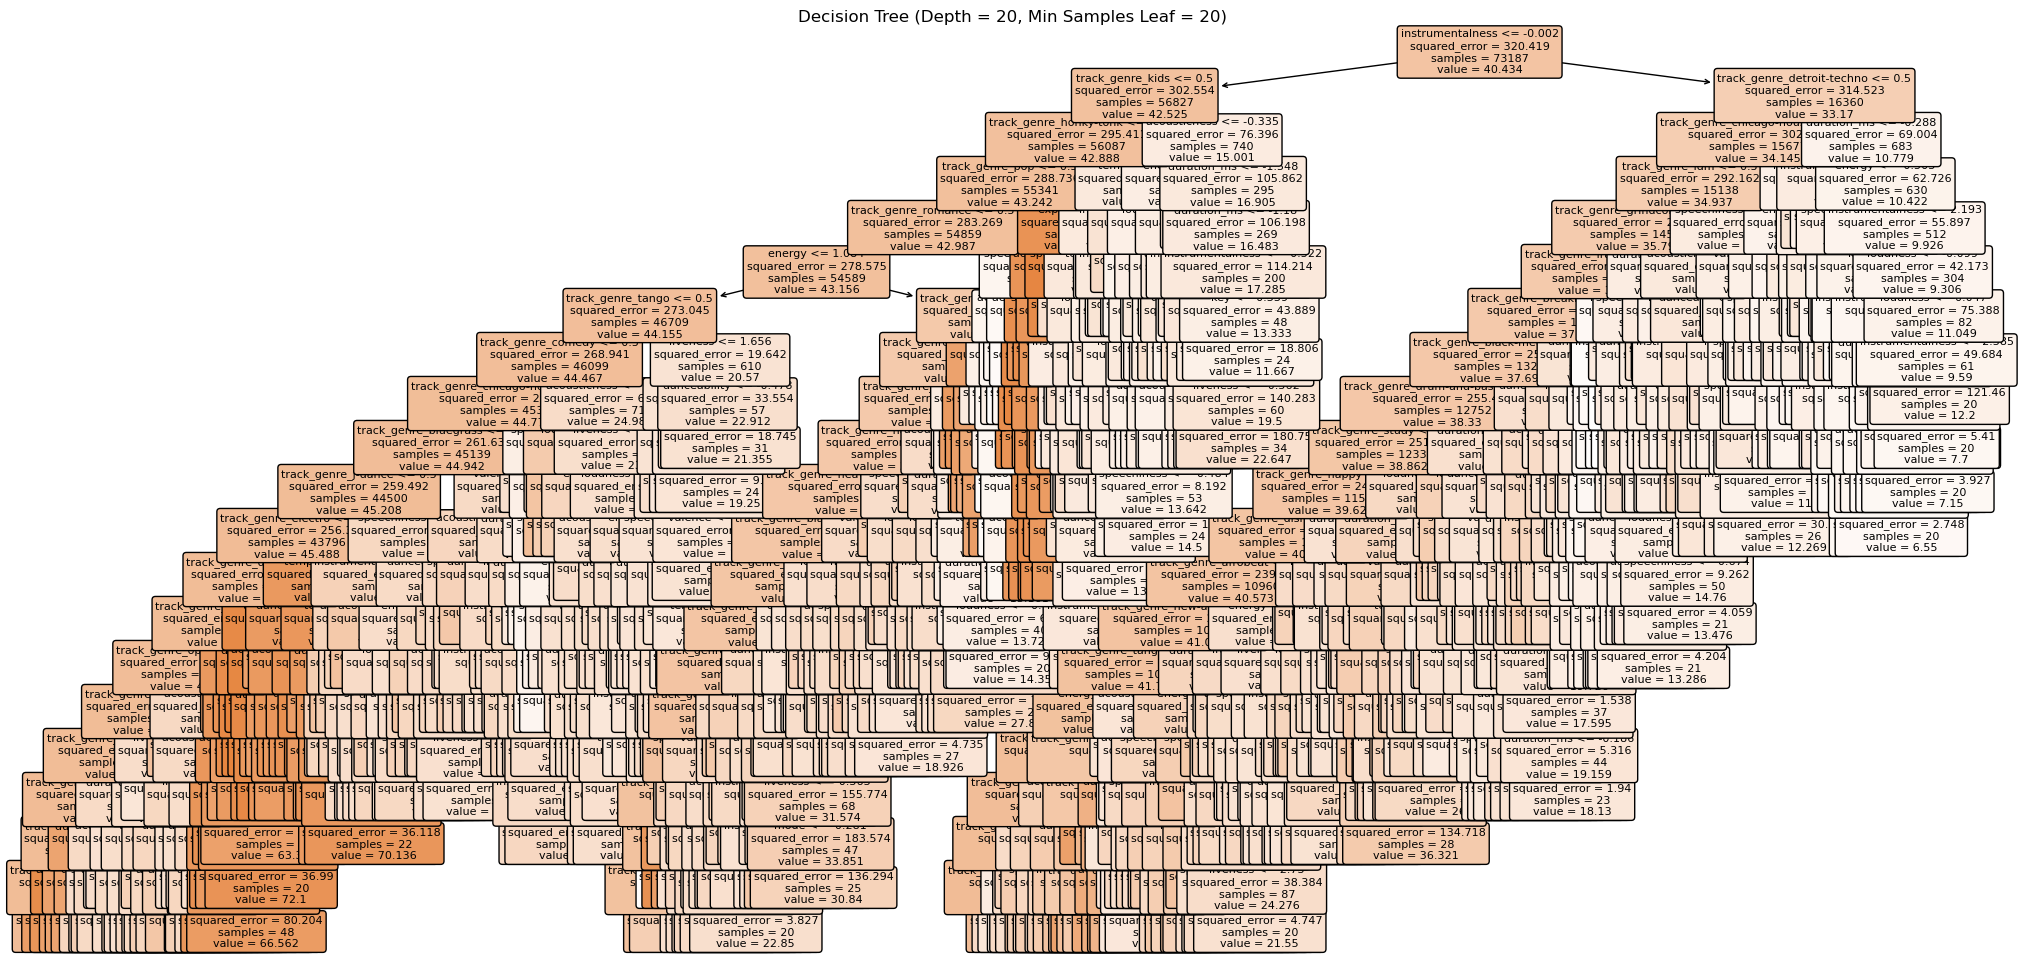

In [6]:
# Decision Tree with min_samples_leaf to control overfitting

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("Cleaned_Dataset.csv")
df['explicit'] = df['explicit'].astype(int)

numerical_features = [
    'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
    'mode', 'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo', 'time_signature'
]
categorical_features = ['track_genre']
all_features = numerical_features + categorical_features

X = df[all_features]
y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One Hot Encode
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', DecisionTreeRegressor(random_state=42))
])

# Grid search over max_depth and min_samples_leaf
param_grid = {
    'model__max_depth': [12, 15, 20],
    'model__min_samples_leaf': [1, 5, 10, 20]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_pipeline = grid_search.best_estimator_
y_train_pred = best_pipeline.predict(X_train)
y_test_pred = best_pipeline.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))

best_tree = best_pipeline.named_steps['model']
ohe = best_pipeline.named_steps['preprocess'].named_transformers_['cat']
encoded_cat_names = ohe.get_feature_names_out(categorical_features)
feature_names = numerical_features + list(encoded_cat_names)

plt.figure(figsize=(24, 12))
plot_tree(best_tree,
          feature_names=feature_names,
          filled=True,
          rounded=True,
          fontsize=8)
plt.title(f"Decision Tree (Depth = {grid_search.best_params_['model__max_depth']}, "
          f"Min Samples Leaf = {grid_search.best_params_['model__min_samples_leaf']})")
plt.show()

Best Parameters: {'model__ccp_alpha': 0.02, 'model__max_depth': 25}
Train R²: 0.4745019704805604
Test R²: 0.4512415557285361
Test MSE: 175.06714509222817


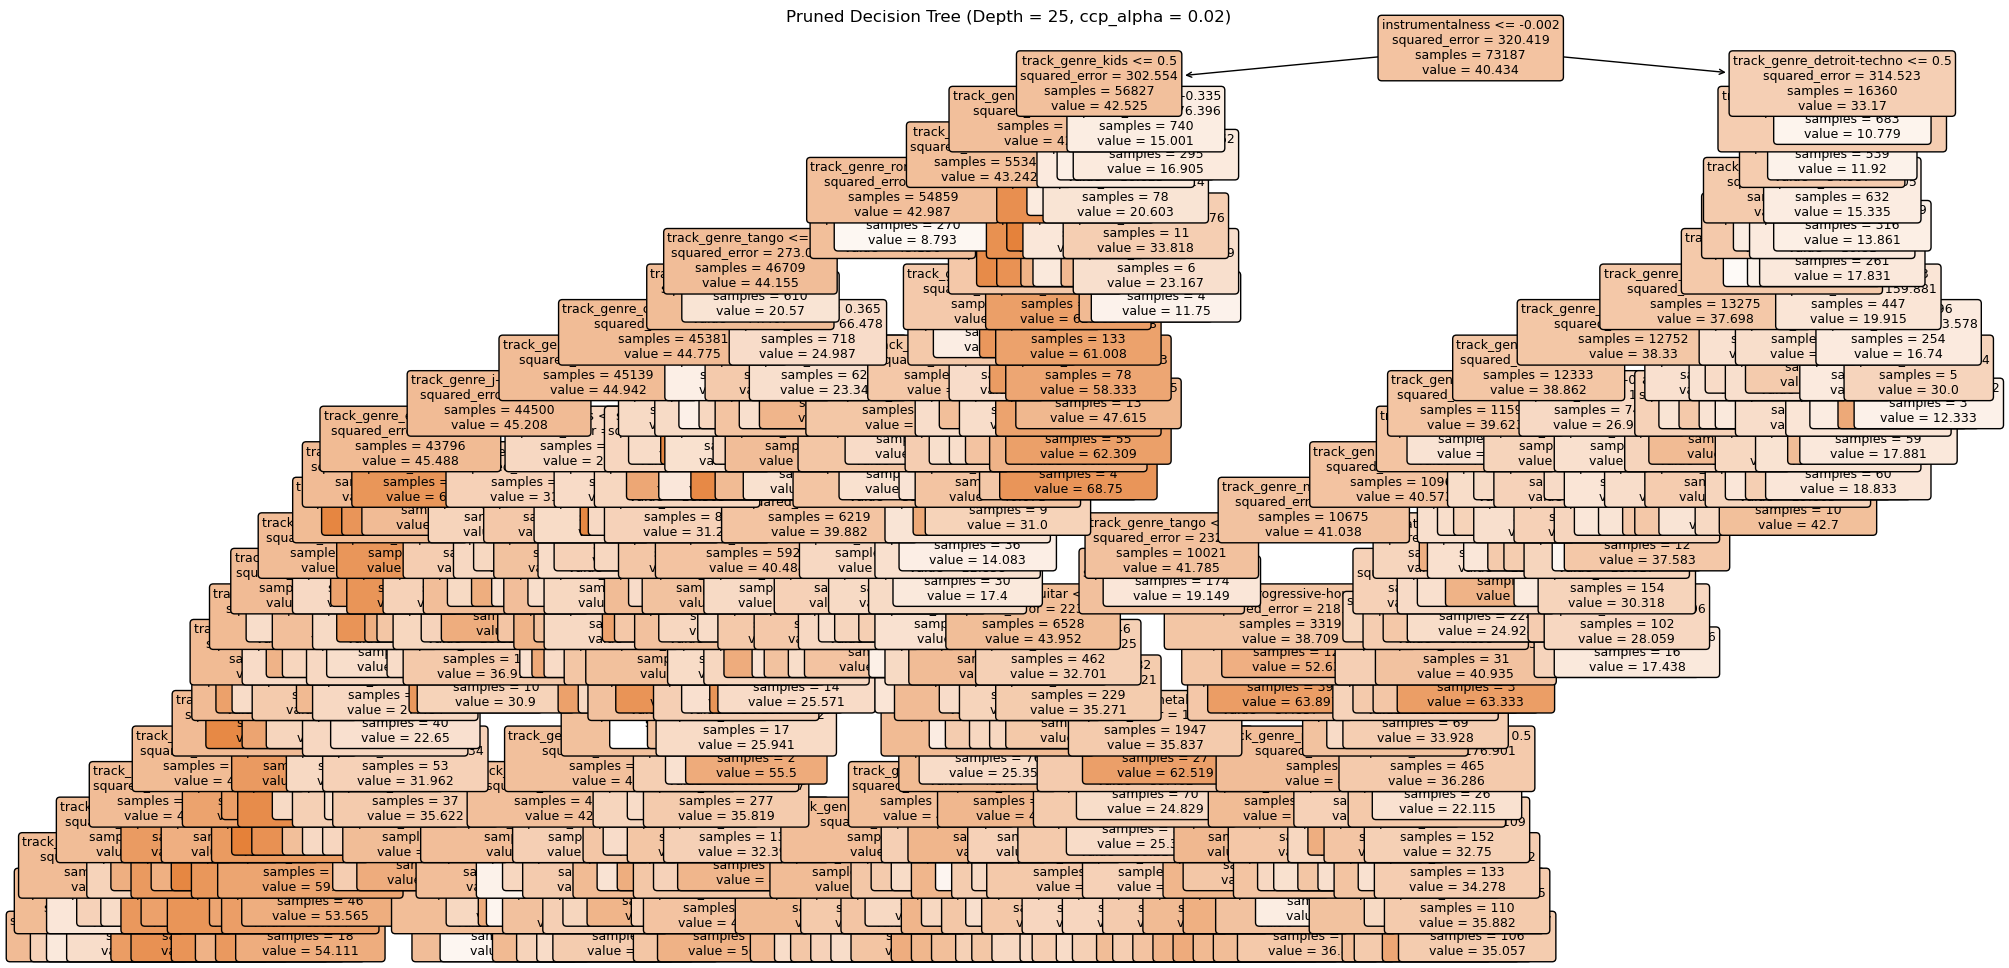

In [7]:
# Regular Decision Tree with Pruning

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv("Cleaned_Dataset.csv")
df['explicit'] = df['explicit'].astype(int)

numerical_features = [
    'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
    'mode', 'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo', 'time_signature'
]
categorical_features = ['track_genre']
all_features = numerical_features + categorical_features

X = df[all_features]
y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Combined pipeline
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', DecisionTreeRegressor(random_state=42))
])

param_grid = {
    'model__max_depth': [8, 10, 12, 25],
    'model__ccp_alpha': [0.0, 0.001, 0.005, 0.01, 0.02]
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

best_pipeline = grid_search.best_estimator_
y_train_pred = best_pipeline.predict(X_train)
y_test_pred = best_pipeline.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))

best_tree = best_pipeline.named_steps['model']
ohe = best_pipeline.named_steps['preprocess'].named_transformers_['cat']
encoded_cat_names = ohe.get_feature_names_out(categorical_features)
feature_names = numerical_features + list(encoded_cat_names)

plt.figure(figsize=(24, 12))
plot_tree(best_tree,
          feature_names=feature_names,
          filled=True,
          rounded=True,
          fontsize=9)
plt.title(f"Pruned Decision Tree (Depth = {grid_search.best_params_['model__max_depth']}, "
          f"ccp_alpha = {grid_search.best_params_['model__ccp_alpha']})")
plt.show()


Train R²: 0.9505017834925739
Test R²: 0.6608632116588498
Test MSE: 108.19279402516487


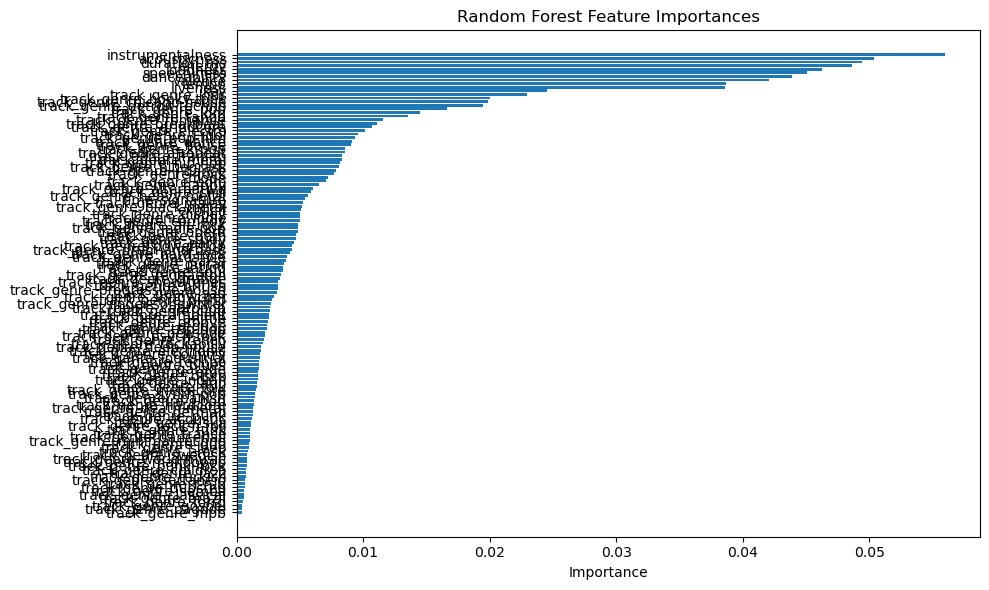

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv("Cleaned_Dataset.csv")

df['explicit'] = df['explicit'].astype(int)

numerical_features = [
    'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
    'mode', 'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo', 'time_signature'
]
categorical_features = ['track_genre']
all_features = numerical_features + categorical_features

X = df[all_features]
y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessor
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Pipeline with manually set parameters
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=200,
        max_depth=None,
        min_samples_leaf=1,
        min_samples_split=2,
        max_features='log2',
        random_state=42,
        n_jobs=-1
    ))
])

pipeline.fit(X_train, y_train)

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))

rf_model = pipeline.named_steps['model']
ohe = pipeline.named_steps['preprocess'].named_transformers_['cat']
encoded_cat_names = ohe.get_feature_names_out(categorical_features)
feature_names = numerical_features + list(encoded_cat_names)

importances = rf_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("Random Forest Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

Best Parameters: {'model__learning_rate': 0.1, 'model__max_depth': 10, 'model__min_child_weight': 5, 'model__n_estimators': 200}
Train R^2: 0.7686972239235145
Test R^2: 0.6403529155838488
Test MSE: 114.73607188508699


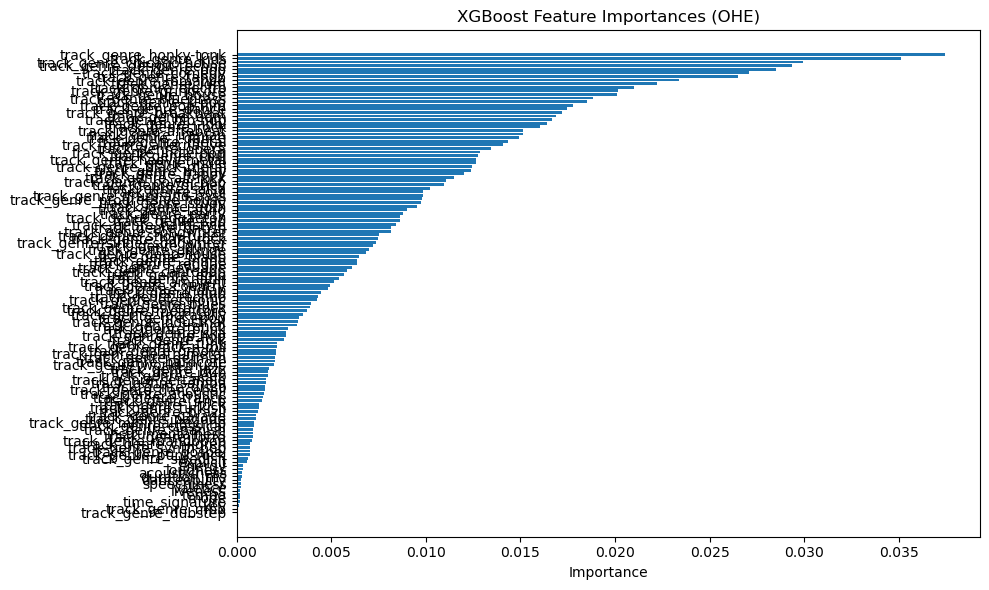

In [10]:
# XGBoost with Grid Search

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv("Cleaned_Dataset.csv")

df['explicit'] = df['explicit'].astype(int)

numerical_features = [
    'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
    'mode', 'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo', 'time_signature'
]
categorical_features = ['track_genre']
all_features = numerical_features + categorical_features

X = df[all_features]
y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', 'passthrough', numerical_features),  # XGBoost handles unscaled numerics well
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

xgb_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', XGBRegressor(objective='reg:squarederror', n_jobs=-1, random_state=42))
])

param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 6, 10],
    'model__learning_rate': [0.05, 0.1],
    'model__min_child_weight': [1, 5]
}

grid_search = GridSearchCV(
    xgb_pipeline,
    param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_pipeline = grid_search.best_estimator_

y_train_pred = best_pipeline.predict(X_train)
y_test_pred = best_pipeline.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("Train R^2:", r2_score(y_train, y_train_pred))
print("Test R^2:", r2_score(y_test, y_test_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))

xgb_model = best_pipeline.named_steps['model']
ohe = best_pipeline.named_steps['preprocess'].named_transformers_['cat']
encoded_cat_names = ohe.get_feature_names_out(categorical_features)
feature_names = numerical_features + list(encoded_cat_names)
importances = xgb_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("XGBoost Feature Importances (OHE)")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'model__learning_rate': 0.08135066533871785, 'model__max_depth': 14, 'model__min_child_weight': 9, 'model__n_estimators': 256}
Train R^2: 0.8428065332574556
Test R^2: 0.6540117839977511
Test MSE: 110.37856427244898


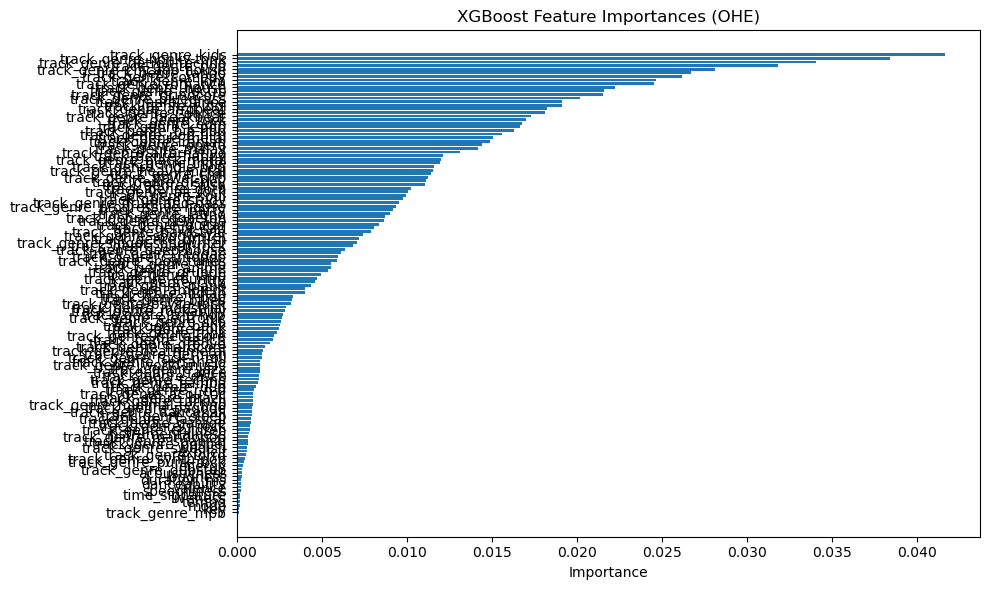

In [11]:
# XGBoost with Random Search

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import randint, uniform

df = pd.read_csv("Cleaned_Dataset.csv")

df['explicit'] = df['explicit'].astype(int)

numerical_features = [
    'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
    'mode', 'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo', 'time_signature'
]
categorical_features = ['track_genre']
all_features = numerical_features + categorical_features

X = df[all_features]
y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Preprocessing
preprocessor = ColumnTransformer([
    ('num', 'passthrough', numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

xgb_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', XGBRegressor(objective='reg:squarederror', n_jobs=-1, random_state=42))
])

param_dist = {
    'model__n_estimators': randint(100, 300),
    'model__max_depth': randint(3, 15),
    'model__learning_rate': uniform(0.01, 0.2),
    'model__min_child_weight': randint(1, 10)
}

random_search = RandomizedSearchCV(
    xgb_pipeline,
    param_distributions=param_dist,
    n_iter=20,
    scoring='r2',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)
best_pipeline = random_search.best_estimator_

y_train_pred = best_pipeline.predict(X_train)
y_test_pred = best_pipeline.predict(X_test)

print("Best Parameters:", random_search.best_params_)
print("Train R^2:", r2_score(y_train, y_train_pred))
print("Test R^2:", r2_score(y_test, y_test_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))

xgb_model = best_pipeline.named_steps['model']
ohe = best_pipeline.named_steps['preprocess'].named_transformers_['cat']
encoded_cat_names = ohe.get_feature_names_out(categorical_features)
feature_names = numerical_features + list(encoded_cat_names)
importances = xgb_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("XGBoost Feature Importances (OHE)")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

Fitting 3 folds for each of 27 candidates, totalling 81 fits


C:\Users\xayas\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best Parameters: {'model__base_estimator__max_depth': 20, 'model__base_estimator__min_samples_leaf': 10, 'model__n_estimators': 50}
Train R^2: 0.45888266509885345
Test R^2: 0.4378873527187326
Test MSE: 179.32745711168533


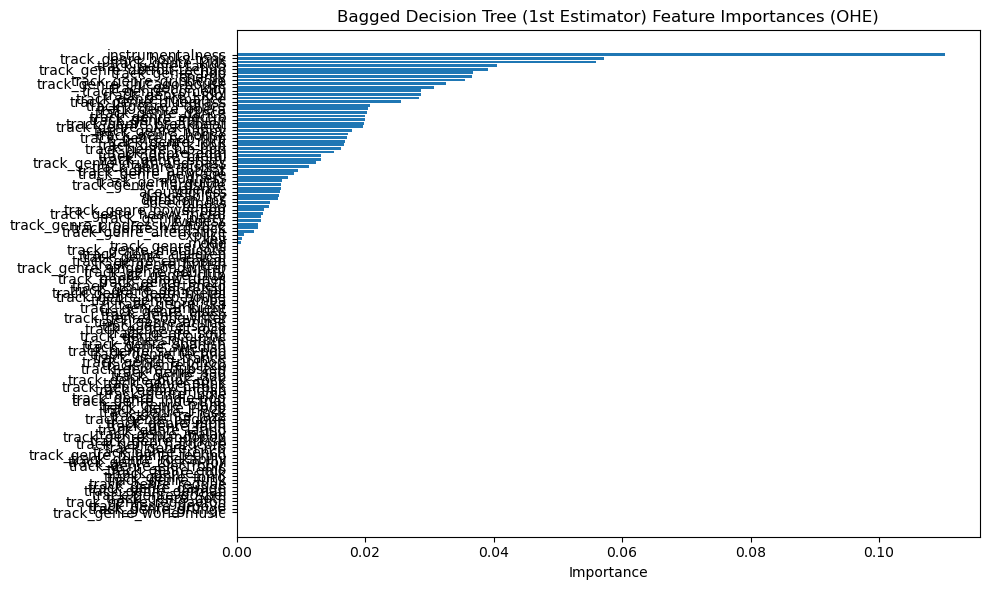

In [12]:
# Bagged Forest

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv("Cleaned_Dataset.csv")

df['explicit'] = df['explicit'].astype(int)

numerical_features = [
    'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
    'mode', 'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo', 'time_signature'
]
categorical_features = ['track_genre']
all_features = numerical_features + categorical_features

X = df[all_features]
y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Preprocessing
preprocessor = ColumnTransformer([
    ('num', 'passthrough', numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', BaggingRegressor(
        base_estimator=DecisionTreeRegressor(random_state=42),
        random_state=42,
        n_jobs=-1
    ))
])

param_grid = {
    'model__n_estimators': [10, 50, 100],
    'model__base_estimator__max_depth': [10, 15, 20],
    'model__base_estimator__min_samples_leaf': [1, 5, 10]
}

grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_pipeline = grid_search.best_estimator_

y_train_pred = best_pipeline.predict(X_train)
y_test_pred = best_pipeline.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("Train R^2:", r2_score(y_train, y_train_pred))
print("Test R^2:", r2_score(y_test, y_test_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))

first_tree = best_pipeline.named_steps['model'].estimators_[0]
ohe = best_pipeline.named_steps['preprocess'].named_transformers_['cat']
encoded_cat_names = ohe.get_feature_names_out(categorical_features)
feature_names = numerical_features + list(encoded_cat_names)

importances = first_tree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("Bagged Decision Tree (1st Estimator) Feature Importances (OHE)")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Importance")
plt.tight_layout()
plt.show()